In [36]:
from math import radians, sin, cos, sqrt, atan2

latest_location = {"latitude": 22.9952116, "longitude": 72.6041505}

# Predefined locations
locations = {
    "home": {"latitude": 22.991497097547864, "longitude": 72.60979031749606},  # Replace with your home coordinates
    "office": {"latitude": 23.152755532906006, "longitude": 72.5432677652376}  # Replace with Adani Shantigram coordinates
}

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance in meters between two latitude/longitude points.
    """
    R = 6371000  # Radius of the Earth in meters
    phi1 = radians(lat1)
    phi2 = radians(lat2)
    delta_phi = radians(lat2 - lat1)
    delta_lambda = radians(lon2 - lon1)

    a = sin(delta_phi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(delta_lambda / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c  # Distance in meters

def location_status(latest_location,locations):
    notify = False
    # Check proximity to home and office
    proximity_status = "Unknown Location"
    for place, coords in locations.items():
        distance = calculate_distance(
            latest_location["latitude"],
            latest_location["longitude"],
            coords["latitude"],
            coords["longitude"]
        )
        if distance <= 750:  # Adjust the proximity range (100 meters)
            proximity_status = place.capitalize()
            break

    if proximity_status == 'Home':
        notify = True
    else:
        notify = False
    
    return [proximity_status,notify]

[proximity,notify] = location_status(latest_location,locations)
print(proximity,notify)

Home True


In [39]:
import requests
import json

# Server URL (replace with your server's URL)
server_url = "https://loc-track-anavart.onrender.com/update_location"

# Latitude and Longitude values
latitude = 29.9952116  # Replace with your desired latitude
longitude = 72.6041505  # Replace with your desired longitude

# Data payload
data = {
    "Text": json.dumps({
        "latitude": latitude,
        "longitude": longitude
    })
}

# Send the POST request
try:
    response = requests.post(server_url, json=data)
    if response.status_code == 200:
        print("Location sent successfully!")
        print("Server Response:", response.json())
    else:
        print(f"Failed to send location. Status code: {response.status_code}")
        print("Error message:", response.text)
except Exception as e:
    print(f"An error occurred: {e}")

Location sent successfully!
Server Response: {'dist': 760870, 'message': 'Location updated!', 'notify': False, 'prox_status': 'Unknown Location', 'status': 'success'}


In [11]:
import geopandas as gpd

# Load world map with country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Inspect the dataset
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


/var/folders/w5/pn9_tz8x2s540x1xs34bb50c0000gn/T/ipykernel_20955/2321118197.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [12]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
# Assign custom ratings (example)
world['Rating'] = world['name'].apply(lambda x: 100 if x == 'India' else 50)

# Example printout
print(world[['name', 'Rating']])


                         name  Rating
0                        Fiji      50
1                    Tanzania      50
2                   W. Sahara      50
3                      Canada      50
4    United States of America      50
..                        ...     ...
172                    Serbia      50
173                Montenegro      50
174                    Kosovo      50
175       Trinidad and Tobago      50
176                  S. Sudan      50

[177 rows x 2 columns]


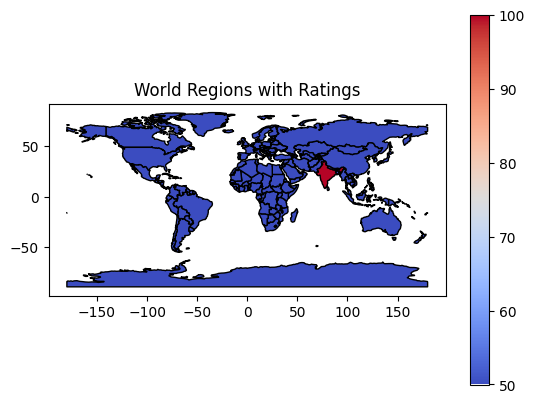

In [5]:
import matplotlib.pyplot as plt

# Plot the regions with ratings
world.plot(column='Rating', legend=True, cmap='coolwarm', edgecolor='black')
plt.title('World Regions with Ratings')
plt.show()
